In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = pd.read_csv('../datasets/SA_same_ratio/train_dataset_ratio.csv')
test_data = pd.read_csv('../datasets/SA_same_ratio/test_dataset_ratio.csv')

In [3]:
Labels={
 0: "negative",
 1: "neutral",
 2: "positive",
}

In [4]:
train_data['label']=train_data['three_emo_0n1n2p']
train_data=train_data.replace({"label": Labels})
train_data

,text,Order,topic,topic_number,five_emo,three_emo_0n1n2p,three_emo_0n1n2p2,text_len,label
0,"stories with intrigue, character development ...",303,Narrative,53,2.0,0,2,7,negative
1,I also think it would be better if they devel...,136,Interaction and Socialisation,51,2.0,0,2,27,negative
2,the devs do not seem to have what it takes to...,318,Developer,43,2.0,0,2,17,negative
3,... we are discovering language of aliens but ...,450,Exploration,47,2.0,0,2,24,negative
4,"Being a difficult game it is,",726,Difficulty and Game Balance,44,2.0,0,2,6,negative
...,...,...,...,...,...,...,...,...,...
2172,When a player settles down on a planet and mak...,2930,Ownership,22,4.0,2,0,30,positive
2173,I'm sure it will be better after some time in ...,1548,Development states,37,2.0,0,2,12,negative
2174,"Gunfights are scary, loud, and you feel relie...",127,Survival mechanics,12,5.0,2,0,20,positive
2175,I enjoy going with a full team being commander...,1209,Interaction and Socialisation,51,5.0,2,0,28,positive


In [5]:
test_data['label']=test_data['three_emo_0n1n2p']
test_data=test_data.replace({"label": Labels})
test_data

,text,Order,topic,topic_number,five_emo,three_emo_0n1n2p,three_emo_0n1n2p2,text_len,label
0,"in addition, the developers made the game as a...",1554,Updates,60,3.0,1,1,79,neutral
1,as trolls will gladly make them inaccessible.,681,Interaction and Socialisation,51,1.0,0,2,7,negative
2,"l, kinda pricey too even after discount it jus...",1750,Price-quality ratio,38,2.0,0,2,14,negative
3,"There's still lots for me to discover for now,",2680,Exploration,47,5.0,2,0,9,positive
4,"you ""cannot"" talk about this game and not talk...",3032,Novelty,54,2.0,0,2,61,negative
...,...,...,...,...,...,...,...,...,...
929,still knows it's a GAME and is firmly focused ...,2240,Engaging Gameplay,46,5.0,2,0,19,positive
930,Sometimes the 'profanity' filter disallows som...,2213,Content filter,16,2.0,0,2,50,negative
931,"the sound for this game is really good, guns f...",2568,Audio,39,5.0,2,0,30,positive
932,The hostages are governed by some of the worst...,2461,Interaction and Socialisation,51,1.0,0,2,85,negative


In [6]:
# Feature extraction
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['text'])
X_test = vectorizer.transform(test_data['text'])

y_train = train_data['label']
y_test = test_data['label']

In [7]:
# Define the SVM classifier
svm_classifier = SVC(kernel='linear')

In [8]:
# Perform cross-validation
cv = StratifiedKFold(n_splits=5)
accuracy_scores = cross_val_score(svm_classifier, X_train, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(svm_classifier, X_train, y_train, cv=cv, scoring='precision_weighted')
f1_scores = cross_val_score(svm_classifier, X_train, y_train, cv=cv, scoring='f1_weighted')

In [9]:
print(f"Cross-Validation Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Cross-Validation Precision: {np.mean(precision_scores):.4f}")
print(f"Cross-Validation F1 Score: {np.mean(f1_scores):.4f}")

Cross-Validation Accuracy: 0.6031
Cross-Validation Precision: 0.5917
Cross-Validation F1 Score: 0.5965


In [10]:
# Train the classifier on the full training set
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [11]:
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Test Accuracy: 0.6188
Test Precision: 0.6084
Test F1 Score: 0.6126


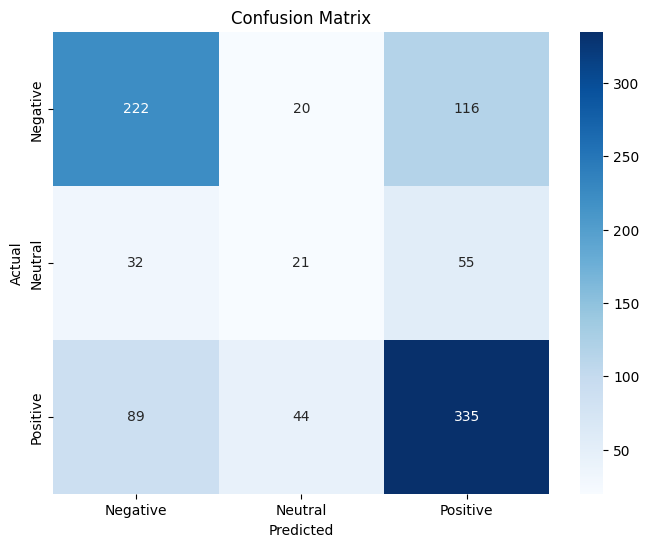

In [12]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fold Accuracy: 0.5826
Fold Precision: 0.5570
Fold F1 Score: 0.5676
Fold Accuracy: 0.6147
Fold Precision: 0.5933
Fold F1 Score: 0.6031
Fold Accuracy: 0.6161
Fold Precision: 0.6127
Fold F1 Score: 0.6143
Fold Accuracy: 0.6230
Fold Precision: 0.6203
Fold F1 Score: 0.6199
Fold Accuracy: 0.6046
Fold Precision: 0.5894
Fold F1 Score: 0.5960

Cross-Validation Results:
Mean Accuracy: 0.6082
Mean Precision: 0.5945
Mean F1 Score: 0.6002

Test Set Results:
Accuracy: 0.6188
Precision: 0.6084
F1 Score: 0.6126


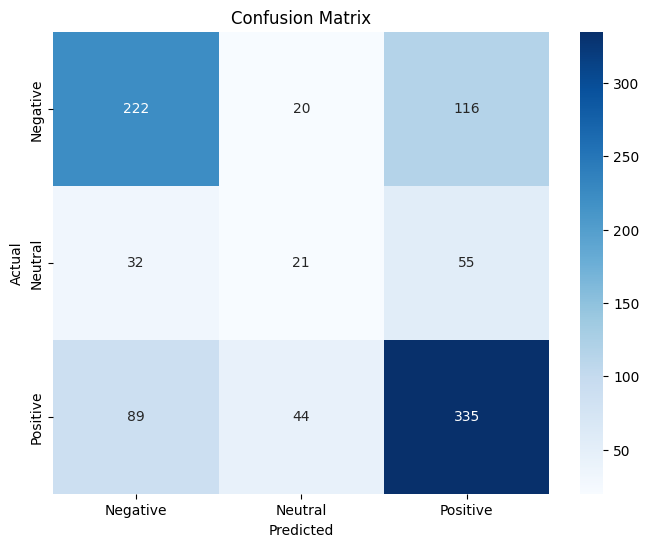

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Feature extraction
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['text'])
X_test = vectorizer.transform(test_data['text'])

y_train = train_data['label']
y_test = test_data['label']

# Combine the vectorizer and the classifier into a pipeline
pipeline = make_pipeline(CountVectorizer(), SVC(kernel='linear'))

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
precisions = []
f1s = []

for train_index, val_index in kf.split(train_data['text']):
    X_train_fold, X_val_fold = train_data['text'].iloc[train_index], train_data['text'].iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    pipeline.fit(X_train_fold, y_train_fold)
    y_pred_fold = pipeline.predict(X_val_fold)
    
    accuracies.append(accuracy_score(y_val_fold, y_pred_fold))
    precisions.append(precision_score(y_val_fold, y_pred_fold, average='weighted'))
    f1s.append(f1_score(y_val_fold, y_pred_fold, average='weighted'))
    
    print(f"Fold Accuracy: {accuracies[-1]:.4f}")
    print(f"Fold Precision: {precisions[-1]:.4f}")
    print(f"Fold F1 Score: {f1s[-1]:.4f}")

# Print mean values
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {sum(accuracies)/len(accuracies):.4f}")
print(f"Mean Precision: {sum(precisions)/len(precisions):.4f}")
print(f"Mean F1 Score: {sum(f1s)/len(f1s):.4f}")

# Train final model on full training data
pipeline.fit(train_data['text'], y_train)

# Predict on test data
y_pred = pipeline.predict(test_data['text'])

# Evaluate the final model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nTest Set Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()